# PROBLEM STATEMENT

Fashion training set consists of 70,000 images divided into 60,000 training and 10,000 testing samples. Dataset sample consists of 28x28 grayscale image, associated with a label from 10 classes. 

The 10 classes are as follows:  
0 => T-shirt/top
1 => Trouser
2 => Pullover
3 => Dress
4 => Coat
5 => Sandal
6 => Shirt
7 => Sneaker
8 => Bag
9 => Ankle boot

Each image is 28 pixels in height and 28 pixels in width, for a total of 784 pixels in total. Each pixel has a single pixel-value associated with it, indicating the lightness or darkness of that pixel, with higher numbers meaning darker. This pixel-value is an integer between 0 and 255.


In [2]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
fashion_train_df = pd.read_csv('data/fashion-mnist_train.csv',sep=',')

In [4]:
fashion_test_df = pd.read_csv('data/fashion-mnist_test.csv',sep=',')

In [5]:
#visualize dataset
fashion_train_df.shape

(60000, 785)

In [6]:
fashion_train_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
fashion_train_df.tail()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
59995,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,1,0,0,0,0,0,0,0,0,0,...,73,0,0,0,0,0,0,0,0,0
59997,8,0,0,0,0,0,0,0,0,0,...,160,162,163,135,94,0,0,0,0,0
59998,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59999,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
fashion_test_df.shape

(10000, 785)

In [9]:
fashion_test_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
training = np.array(fashion_train_df,dtype='float32')

In [11]:
testing = np.array(fashion_test_df,dtype='float32')

8.0

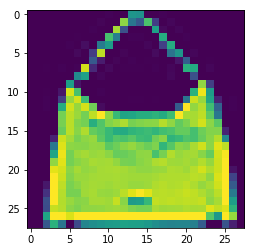

In [12]:
import random
i = random.randint(1,60000)
plt.imshow(training[i,1:].reshape(28,28))
label = training[i,0]
label

In [13]:
#training model

In [14]:
X_train = training[:,1:]/255
y_train = training[:,0]

In [15]:
X_test = testing[:,1:]/255
y_test = testing[:,0]

In [16]:
#split dataset
from sklearn.model_selection import train_test_split

In [17]:
 X_train, X_validate, y_train, y_validate = train_test_split(X_train,y_train, test_size=0.2,random_state=12345)

In [18]:
#reshape training data to 28*28 image with grayscale
X_train = X_train.reshape(X_train.shape[0],*(28,28,1))
X_test = X_test.reshape(X_test.shape[0],*(28,28,1))
X_validate = X_validate.reshape(X_validate.shape[0],*(28,28,1))

In [19]:
#building nueral network

In [20]:
import keras

Using TensorFlow backend.


In [21]:
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

In [22]:
cnn = Sequential()

In [23]:
#add convelutional layer of 3*3 kernal
cnn.add(Conv2D(32,kernel_size=3,input_shape=(28,28,1),activation='relu'))

In [24]:
#pooling layer
cnn.add(MaxPooling2D(pool_size=(2,2)))

In [25]:
#add flatt layer
cnn.add(Flatten())

In [26]:
#add dense
cnn.add(Dense(output_dim=32,activation='relu'))

C:\Users\rajit\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=32)`
  


In [27]:
#add output layer
cnn.add(Dense(output_dim=10,activation='sigmoid'))

C:\Users\rajit\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=10)`
  


In [28]:
#compile the network
cnn.compile(loss='sparse_categorical_crossentropy',optimizer=Adam(lr=0.001),metrics=['accuracy'])

In [29]:
#fit model
epochs = 50 # how many times updating the weights

In [30]:
cnn.fit(x=X_train,y=y_train,batch_size=512,epochs=epochs,verbose=1,validation_data=(X_validate,y_validate))

Train on 48000 samples, validate on 12000 samples
Epoch 1/50
48000/48000 [==============================] - 18s 376us/step - loss: 0.8240 - acc: 0.7251 - val_loss: 0.5115 - val_acc: 0.8197
Epoch 2/50
48000/48000 [==============================] - 16s 329us/step - loss: 0.4553 - acc: 0.8412 - val_loss: 0.4433 - val_acc: 0.8437
Epoch 3/50
48000/48000 [==============================] - 16s 329us/step - loss: 0.4016 - acc: 0.8600 - val_loss: 0.3837 - val_acc: 0.8697
Epoch 4/50
48000/48000 [==============================] - 17s 346us/step - loss: 0.3686 - acc: 0.8724 - val_loss: 0.3718 - val_acc: 0.8719
Epoch 5/50
48000/48000 [==============================] - 17s 346us/step - loss: 0.3496 - acc: 0.8793 - val_loss: 0.3478 - val_acc: 0.8774
Epoch 6/50
48000/48000 [==============================] - 17s 346us/step - loss: 0.3314 - acc: 0.8841 - val_loss: 0.3247 - val_acc: 0.8864
Epoch 7/50
48000/48000 [==============================] - 17s 352us/step - loss: 0.3175 - acc: 0.8907 - val_loss: 0.

In [33]:
#evaluation
evaluation = cnn.evaluate(X_test,y_test)
print('Accuracy=> {}'.format(evaluation[1]))

10000/10000 [==============================] - 1s 136us/step
Accuracy=> 0.9078


In [57]:
predict_class = cnn.predict_classes(X_test)
predict_class

array([0, 1, 2, ..., 8, 8, 1], dtype=int64)

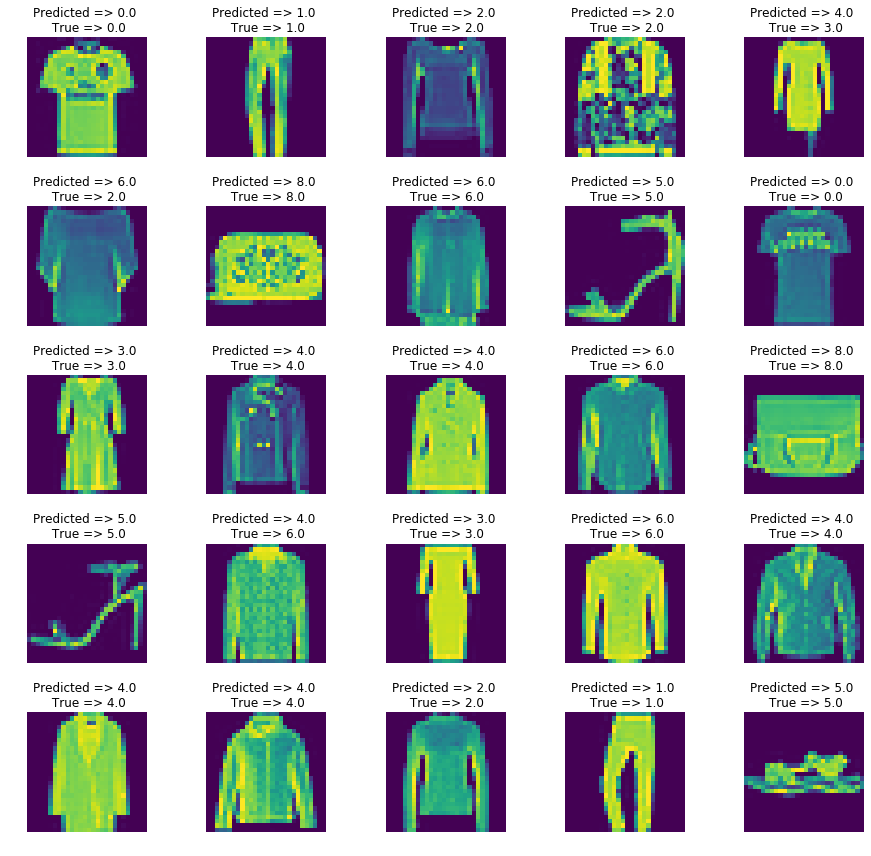

In [58]:
L=5
W=5
fig,axes = plt.subplots(L,W,figsize=(15,15))
axes = axes.ravel()
for i in np.arange(0,L*W):
    axes[i].imshow(X_test[i].reshape(28,28))
    axes[i].set_title("Predicted => {:0.1f} \n True => {:0.1f}".format(predict_class[i],y_test[i]))
    axes[i].axis('off')
plt.subplots_adjust(wspace=0.5)

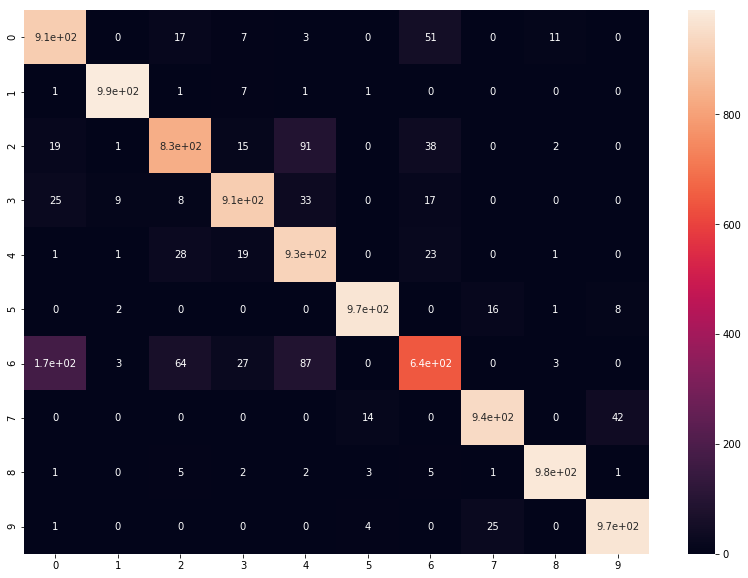

In [60]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm = confusion_matrix(y_test,predict_class)
plt.figure(figsize=(14,10))
sns.heatmap(cm,annot=True)

In [61]:
from sklearn.metrics import classification_report
num = 10
target_names = ["Class {}".format(i) for i in range(num)]
print(classification_report(y_test,predict_class,target_names=target_names))

              precision    recall  f1-score   support

     Class 0       0.80      0.91      0.85      1000
     Class 1       0.98      0.99      0.99      1000
     Class 2       0.87      0.83      0.85      1000
     Class 3       0.92      0.91      0.91      1000
     Class 4       0.81      0.93      0.86      1000
     Class 5       0.98      0.97      0.98      1000
     Class 6       0.83      0.64      0.72      1000
     Class 7       0.96      0.94      0.95      1000
     Class 8       0.98      0.98      0.98      1000
     Class 9       0.95      0.97      0.96      1000

   micro avg       0.91      0.91      0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



# How to improve model

Improve accuracy by adding more feature detectors/filters or adding a dropout <br>
dropout regularization technique for reducing overfitting in neural networks
